# FEM Notebook 2: Introduction to the Finite Element Method

## Introduction
Welcome to the second notebook in my series "Understanding and Using the Finite Element Method". We now have a strong enough mathematical foundation to begin introducing new mathematics, which will help us define the algorithm that is FEM. We will start in 1-dimensional problems, with domains that lie strictly on the $x$-axis, and work our way up to 2.

### Learning Objectives

- To understand the space of piecewise continuous linear polynomials $V_h$ and its basis.
- To be able to construct and solve a finite element problem in 1D.

## 3. Finite Element Method in 1D

### 3.1 What is the goal of FEM?

Finite Element Analysis is a tool for solving partial differential equations. For example consider the equation 

$$ -\frac{\mathrm{d}^2 u}{\mathrm{d} x^2} = f(x) \,, \quad u(0) = 0 \,,\, u(L) = 0 \,, \quad 0 \leq x \leq L \tag*{[3]}$$ 

where $u$ and $f$ are single variable functions of $x$. Since, for now, we are only concerned with 1-dimensional functions, partial differential equations are the same as differential equations, because there is only one variable to differentiate with respect to. For most $f$, we can easily solve this by integrating twice, but it will serve as an example for this chapter. We can check the difference between our answer and analytical solution, and calculate the error between the two. More importantly however, this approach will work even for complicated functions that we cannot integrate.

The goal of FEM is to produce a suitable approximation of $u$ that solves (1). It is done by splitting the domain up into a set of small regions called a mesh. Then, we assume our approximation of $u$, denoted $u_h$ is a combination of straight lines, one from each of the individual regions on our mesh. We can also rewrite (1) in a new way, called the variational form. Finally, we insert our $u_h$ in for $u$, which provides us with a system of linear equations we can solve, to find the values of our approximated function. This is the general outline of how FEM works in 1D, and the higher dimensional versions work very similarly too!

We need to start by defining the space our approximated solution comes from. This space is called the space of **Piecewise Continuous Linear Polynomials**.

### 3.2 The Space of Piecewise Continous Linear Polynomials

All of our PDEs will be solved over an interval for example $I = [0, L]$. The square brackets indicate that the end points are included. Our approach involves splitting the interval into a **mesh**, which is a collection of $n$ equally-sized sub-intervals, at the points $\{x_i\}_{i=0}^{n-1}$. Fig 5 shows an example of a simple 1-dimensional mesh on a numberline. Each sub-interval is of size $1$, leading to $x_i=i$ for $i=0,\cdots,L$. 

<img src="1d_mesh.png" style="display:block;margin-left:auto;margin-right:auto;width:50%">
<figcaption style="font-style:italic;text-align:center;">Fig.5 - Interval on the numberline</figcaption>

Let's focus on a single sub-interval $J = [x_0, x_1]$. Since our solution should be a collection of straight lines, this sub-interval should contain a linear polynomial. We encountered the space of polynomials of at most degree $n$ in section 1.1, so for linear polynomials we have $P_1(J)$. Functions from $P_1(J)$ take the form $v(x) = c_0 + c_1x$. The most obvious choise of basis would therefore be the standard basis $\{ 1, x \}$, since any $v\in P_1(I_i)$ could be specified by only $c_0$ and $c_1$. 

This is not the only basis we can use, and for our purposes it makes more sense to go with a different one. You should be aware that any straight line can be defined by two points it passes through. So if the endpoints of $J$ are $x_0$ and $x_1$ (called the **nodes** of $J$) $v$ can be specified by a line that passes through $v(x_0)=\alpha_0$ and $v(x_1)=\alpha_1$, if these values are known. We can construct a basis where $a_0$ and $a_1$ are the coefficients that can be used to specify any $v\in P_1(J)$. This basis is called the **nodal basis** of $P_1$ and is defined as

$$
\lambda_j(x_i) =
\delta_{ij} =
  \begin{cases}
    1 & \text{if $i=j$}\\
    0 & \text{if $i \neq j$}
  \end{cases}
  \quad i,j = 0,1
$$

$\delta_{ij}$ is the **Kronecker delta**, which has been written explicitly. Then we can write $v(x)=\alpha_0\lambda_0(x) + \alpha_1\lambda_1(x)$. So if $x=x_0$, $v(x)=\alpha_0$ and if $x=x_1$, $v(x)=\alpha_1$ as required. If $x$ is between $x_0$ and $x_1$, the function should linearly interpolate between these values. The explicit form of this basis is 

$$
\lambda_0(x) = \frac{x_1 - x}{x_1 - x_0}, \quad \lambda_1(x) = \frac{x - x_0}{x_1 - x_0}
$$

Now we have this basis for $P_1(J)$. This can now be extended to include the whole mesh, which will be a collection of linear functions. These functions are called 'piecewise' linear, because when considered in individual pieces, a function is linear, but overall the function is not. One condition we must impose is that these piecewise linear functions are continuous. This is because the solutions to all PDEs we will be solving will also be continuous. Below are two examples of piecewise linear functions. One is continous and the other is not.

<table><tr>
<td> <img src="Discontinuous_piecewise_linear.png" alt="Drawing"/> 
    <figcaption style="font-style:italic;text-align:center;">Fig.6 - Discontinuous Piecewise Linear Function</figcaption> </td>
<td> <img src="Continuous_piecewise_linear.png" alt="Drawing"/> 
    <figcaption style="font-style:italic;text-align:center;">Fig.7 - Continuous Piecewise Linear Function</figcaption> </td>
</tr></table>

We are now in a position to properly define the vector space over which our solution will be defined. This is 

$$ V_h = \Big\{ v \, : \, v \in C^0(I) \, , \,\, v|_{I_i}\in P_1(I_i)\Big\}.$$

Here, $C^0(I)$ is the set of continuous functions defined on the interval $I$. So $V_h$ includes functions that are continuous on $I$ and linear on each subinterval $I_i$. Once again we define $I = [0, L]$ with $\{x_i\}_{i=0}^{n-1}$ being the nodes of our mesh. The basis for this vector space isn't too dissimilar from the nodal basis of $P_1$. In this case, it is defined as

$$
\phi_j(x_i) =
\delta_{ij} =
  \begin{cases}
    1 & \text{if $i=j$}\\
    0 & \text{if $i \neq j$}
  \end{cases}
  \quad i,j = 0,1,\cdots,n
$$

Where at the node $x_i$, the function takes the value $1$ and at all other nodes it is $0$. The function linearly interpolates between these values, meaning it forms a straight line connecting $(x_i,1)$ to $(x_{i-1}, 0)$ and $(x_i,1)$ to $(x_{i+1}, 0)$. These basis functions are called **Lagrange Polynomials** the $1$st degree. Written explicitly, they are defined as, 

$$
\phi_i(x) =
  \begin{cases}
    (x-x_{i-1})\,/\,h_i & \text{if $x \in I_i$}\\
    (x_{i+1}-x)\,/\,h_{i+1} & \text{if $x \in I_{i+1}$}\\
    0 & \text{otherwise}
  \end{cases} \tag*{[4]}
$$

This nodal basis has been designed specifically so that any function $v$ can be written as a linear combination of $\phi$'s, where the coefficient of $\phi_i(x)$ is $v(x_i)$. Specifically, $v(x) = \sum_{i=0}^{n-1} \phi_i(x)v(x_i)$. These functions $\phi_i(x)$ are often called **hat functions** due to their shape (seen below), while the hat functions closest to the edge of the interval are called **half-hats**.

<table><tr>
<td> <img src="Half_hat.png" alt="Drawing"/> 
    <figcaption style="font-style:italic;text-align:center;">Fig.8 - Half-Hat $\phi_0$ on a mesh with $5$ nodes</figcaption> </td>
<td> <img src="Hat.png" alt="Drawing"/> 
    <figcaption style="font-style:italic;text-align:center;">Fig.9 - Hat $\phi_5$ on a mesh with $10$ nodes</figcaption> </td>
</tr></table>

##### Check Exercises 7

- Prove that $\{ \phi_i(x) \}_{i=0}^{n}$ is a basis for $V_h$ defined on a mesh with $n+1$ nodes.
- What is the dimension of $V_h$ on such a mesh?

### 3.3 Variational Formulation

Let's return to our initial example.

$$ -\frac{\mathrm{d}^2 u}{\mathrm{d} x^2} = f(x) \,, \quad u(0) = 0 \,,\, u(L) = 0 \,, \quad 0 \leq x \leq L \tag*{[5]}$$

One of the key tricks to Finite Element Analysis is through converting a partial differential equation into a **variational** or **weak** form. This is done by multiplying both sides of the equation by a **test function** $v$. It should be mentioned that $u$, the function we are solving for, is often called the **trial function**. We will assume the test function vanishes at the end-points of our interval. We do this multiplication, then integrate by parts to yield the weak formulation of (3).

$$ 
\begin{align*}
-vu'' &= vf \\
\int_0^L vf \, \mathrm{d}x &= -\int_0^L vu'' \mathrm{d}x \\
&= -\Big[vu'\Big]_0^L + \int_0^Lv'u'\,\mathrm{d}x \\
&= -v(0)u'(0) + v(L)u'(L) + \int_0^Lv'u'\,\mathrm{d}x \\
&= \int_0^Lv'u'\,\mathrm{d}x
\end{align*}
$$

We should add a quick side note to talk about the function spaces involved here. In order for the above to be true, we must have that $v$ and $v'$ are **square integrable** on $I$. For some function $f$ to be square integrable, the integral $\int_I |f(x)|^2 \, \mathrm{d}x$ must be finite. The space of square integrable functions defined on some interval $I$ is called $L^2(I)$, which is an **inner product space** defined with the inner product $\langle f, g \rangle = \int_I \bar{f}g \, \mathrm{d}x$. Since $\bar{f}f=|f|^2$, an equivalent definition of square integrability is that $\langle f, f \rangle_{L^2(I)} < \infty$. It then follows that $L^2(I)$ is a **Hilbert Space**. So, in order for the above to be true, we must have $v, v' \in L^2(I)$, but this is precisely the definition of the **Sobloev space** $H^1(I)$ equipped with the $L^2$ inner product. A Sobloev space is just a Hilbert space where derivatives must be square integrable as well. Therefore, we must have $v \in H^1(I)$. Therefore we must have that $v \in V_0$, which is defined by

$$V_0 = \Big\{ v \,:\, v \in H^1(I),\,\, v(0) = v(L) = 0 \Big\}.$$

This is called the **test space**, since $v$ must belong to it. The space $u$ comes from is called the **trial space**, denoted simply as $V$, and is the same as the test space only without the requirement that it must vanishes at the endpoints. Instead it has the requirement that any $u$ must meet the values specified by the boundary conditions, but in this case, those conditions are the same. Hence the trial and test spaces are the same. This allows us to fully define our variational problem as,

$$\int_I fv \, \mathrm{d}x = \int_I v'u'\,\mathrm{d}x, \quad \forall v \in V_0.  \tag*{[6]}$$

In this case, the LHS is called the **linear term** and the RHS is called the **bilinear term**. This is a glimpse into the world of functional analysis, and while it is certainly interesting, you might be wondering how this pertains to our numerical method of solving PDEs? Well, the useful thing about $H^1$, and by extension $V_0$, is that it permits functions that have discontinuous derivatives. This is extremely useful, because our piecewise continuous linear polynomials have discontinuous derivatives. You can take a look again at Fig.7 to convince yourself this is true. This means we can transform our weak formulation, which at the minute is a continuous problem, into one that allows for piecewise polynomials to approximate it. 

We only need to introduce one more space, $V_{h,0} = \{v \, : \, v \in V_h, \, v(0)=v(L)=0\}$. This space has the same basis as $V_h$, but with the half-hats at either end of the interval removed, since $v$ is required to be $0$. It then follows that $V_{h,0} \subset V_0$, meaning we can look only at the collection of $v$'s that are piecewise linear and continuous to solve (4). So we can write, 
$$\int_I fv \, \mathrm{d}x = \int_I v'u_h'\,\mathrm{d}x, \quad \forall v \in V_{h,0}. \tag*{[7]}$$

This is our finite element approximation. We will now try to solve this equation for $u_h \in V_{h,0}$, the finite element approximation of $u$. It can be solved by finding the coefficients of the basis vectors that satisfy it. These coefficients are often called **degrees of freedom**.

##### Check Exercises 8

Consider a simplified version of the one dimensional heat equation, where we make the assumption that a metal rod has been heated long enough by some source so that the rod is in a steady state and the heat is unchanging with time. This situation is governed by the equation 

$$-(Aku')' = f$$

$A(x)$ describes the cross-sectional area of the rod, $k(x)$ describes the thermal conductivity, $f(x)$ describes the intensity of the heat source across the rod and $u(x)$ describes the temperature of the rod.

- Produce a variational equation that describes the finite element approximation of the temperature of the bar over the interval $I=[0,L]$.

### 3.4 Constructing a system of linear equations and solving

Recall that a function $v \in V_{h,0}$ can be written $v(x) = \sum_{i=1}^{n-1} c_i \phi_i(x)$ (note the lack of half-hats). Then (5) becomes,

$$ 
\begin{align*}
\int_I \left( f \sum_{i=1}^{n-1} c_i \phi_i(x) \right) \, \mathrm{d}x &= \int_I \left( u_h'\sum_{i=1}^{n-1} c_i \phi_i'(x) \right) \,\mathrm{d}x \\
\sum_{i=1}^{n-1} c_i \int_I f \phi_i(x) \, \mathrm{d}x &= \sum_{i=1}^{n-1} c_i \int_I u_h' \phi_i'(x) \,\mathrm{d}x \\
\sum_{i=1}^{n-1} \int_I f \phi_i(x) \, \mathrm{d}x &= \sum_{i=1}^{n-1} \int_I u_h' \phi_i'(x) \,\mathrm{d}x \\
\int_I f \phi_i(x) \, \mathrm{d}x &= \int_I u_h' \phi_i'(x) \,\mathrm{d}x, \quad i=1,2,\cdots, n-1
\end{align*}
$$

The last line follows by the fact that $\phi_i$ is $0$ everywhere outside of it's sub-interval, allowing us to split the sum into $n-1$ equations. Then, since $u_h \in V_{h,0}$, we can write $u_h = \sum_{j=1}^{n-1} c_i\phi_i $, which leads to, 

$$
\begin{align*}
\int_I f \phi_i \, \mathrm{d}x &= \int_I \left( \sum_{j=1}^{n-1} c_j \phi'_j \right) \phi'_i \, \mathrm{d}x \\
&= \sum_{j=1}^{n-1} c_j \int_I \phi'_j\phi'_i \, \mathrm{d}x, \quad i=1,2,\cdots, n-1
\end{align*}
$$

This is now a system of linear equations. We can rewrite it using the substitutions

$$
\begin{align*}
A_{ij} &= \int_I \phi'_j\phi'_i \, \mathrm{d}x, \quad i,j = 1,2, \cdots, n-1 \\
b_i &= \int_I f \phi_i \, \mathrm{d}x, \quad i=1, 2, \cdots, n-1
\end{align*}
$$

To give us a matrix representation of the system,

$$ \boldsymbol{\underline{\underline{A}}} \, \boldsymbol{\underline{c}} = \boldsymbol{\underline{b}}$$.

$\boldsymbol{\underline{\underline{A}}}$ is called the **mass matrix** and $\boldsymbol{\underline{b}}$ is called the **load vector**. Now that we have this eqaution, we only have to solve it, which can be done in a plethora of ways. Depending on the problem, different numerical approaches exist including Gaussian Elimination, LU-Factorisation, or an iterative method like Jacobi or Gauss-Seidel.

##### Check Exercises 9

- Derive the system of linear equations for the 1-dimensional stationary heat equation, using the variational form you found in Exercise 8.

### 3.5 Example

We consider the equation 

$$
-\frac{\mathrm{d}^2u}{\mathrm{d}x^2} = 1, \quad u(0) = u(9) = 0, \quad 0 \leq x \leq 9.
$$

We know that this can be solved analytically by integrating twice to give $u = -\frac12 x^2 + \frac92x$, but this will allow us to see the difference between our approximation and the actual solution. Firstly, we find the variational form, which is the same as before.

$$
\int_0^{9} v \, \mathrm{d}x = \int_0^{9} v' u' \, \mathrm{d}x, \quad \forall v \in V_0
$$

Then we turn it into our finite element approximation. We will use a mesh of size $n$, so we can vary and view the closeness to the actual result. We have the linear system, 

$$
\boldsymbol{\underline{\underline{A}}} \, \boldsymbol{\underline{c}} = \boldsymbol{\underline{b}}
$$

where,

$$
\begin{align*}
A_{ij} &= \phi'_j\phi'_i \, \mathrm{d}x, \quad i,j = 1,2, \cdots, n-1 \\
b_i &= \int_I \phi_i \, \mathrm{d}x, \quad i=1, 2, \cdots, n-1.
\end{align*}
$$

For demonstration, suppose we choose a mesh of size $3$. Then we will have 

$$
\begin{pmatrix}
\int_0^{9} (\phi'_1)^2 \, \mathrm{d}x & \int_0^{9} \phi'_1\phi'_2 \, \mathrm{d}x \\
\int_0^{9} \phi'_2\phi'_1 \, \mathrm{d}x & \int_0^{9} (\phi'_2)^2 \, \mathrm{d}x \\
\end{pmatrix}
\begin{pmatrix}
c_1 \\
c_2
\end{pmatrix}
=
\begin{pmatrix}
\int_0^{9} \phi_1 \, \mathrm{d}x\\
\int_0^{9} \phi_2 \, \mathrm{d}x
\end{pmatrix}
$$

We find the values of $\phi'_1$ and $\phi'_2$ from (2) and evaluate the integrals. After some calculation our equation becomes,

$$
\begin{pmatrix}
\frac23 & -\frac13 \\
-\frac13 & \frac23 \\
\end{pmatrix}
\begin{pmatrix}
c_1 \\
c_2
\end{pmatrix}
=
\begin{pmatrix}
3\\
3
\end{pmatrix} \\
\begin{pmatrix}
c_1 \\
c_2
\end{pmatrix}
=
\begin{pmatrix}
\frac23 & -\frac13 \\
-\frac13 & \frac23 \\
\end{pmatrix}
^{-1}
\begin{pmatrix}
3\\
3
\end{pmatrix} \\
\begin{pmatrix}
c_1 \\
c_2
\end{pmatrix}
=
\begin{pmatrix}
2 & 1\\
1 & 2 \\
\end{pmatrix}
\begin{pmatrix}
3\\
3
\end{pmatrix} \\
\begin{pmatrix}
c_1 \\
c_2
\end{pmatrix}
=
\begin{pmatrix}
9\\
9
\end{pmatrix}
$$

This gives us our final solution, $u_h = 9\phi_1 + 9\phi_2$. Below you can see some code that plots $u_h$ against the actual solution $u = -\frac12 x^2 + \frac92 x$.

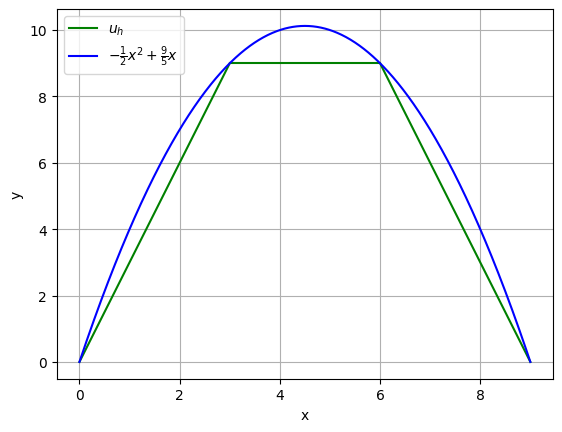

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
X = np.arange(0.0, 9.01, 0.01)
X0_3 = np.arange(0.0, 3.01, 0.01)
X3_6 = np.arange(3.0, 6.01, 0.01)
X6_9 = np.arange(6.0, 9.01, 0.01)

# Degrees of freedom
c_1 = c_2 = 9

# Hat functions
phi1 = c_1*(X0_3/3)
phi2 = c_2*(3-X6_9/3)

# Part where hat functions overlap
phi1PLUSphi2 = c_1*(2-X3_6) + c_2*(X3_6-1)

fig, ax = plt.subplots()

ax.set(xlabel='x', ylabel='y')
ax.grid()

# Plot FEM Approximation
plt.plot(X0_3, phi1, color='green', label=r'$u_h$')
plt.plot(X3_6, phi1PLUSphi2, color='green')
plt.plot(X6_9, phi2, color='green')

# Plot Actual solution
plt.plot(X, -0.5*X**2 + 4.5*X, color='blue', label=r'$-\frac{1}{2} x^2 + \frac{9}{5} x$')

plt.legend(loc="upper left")

fig.savefig("FEMvsActual.png")
plt.show()

There are a few observations we can make about this approach. Clearly, it produces an approximation that resembles the actual solution, but a mesh size of $3$ is too small for an accurate soltuion. With a larger mesh size, it is hopefully clear that we can obtain an approximation with arbitrarily small error when compared to the real solution and this can be proven although we will not do it here. If you were to perform these calculations by hand, you would find they can take a very long time, even for systems with a relatively small number of nodes. Thankfully, the point of FEM is for it to be done on a computer, where millions of computations can be done per second. However, despite the marvel of modern computer engineering, certain certain steps still need to be taken to speed up the computation, sometimes as a sacrifice for accuracy.

Firstly, instead of performing all integrals exactly, numerical integration (often called **quadrature**) is used. This allows for a much faster computation of elements of the mass matrix and load vector. There are many quadrature rules, each with their own trade-offs of speed vs precision, but some famous ones are the *midpoint rule*, the *trapezium rule* and *Simpson's rule*. Secondly, for certain systems, the stiffness matrix is likely to be **sparse**, meaning there is a large number of $0$ entries in the matrix. This is simply because the hat functions don't typically overlap, so a term like $\phi'_i\phi'_j$ is likely to be $0$ for most pairs of $i$ and $j$. This sparseness can be exploited for performance reasons. Furthermore, in the Poisson example, not only is the matrix sparse, but it is also symmetric, which can further be exploited for performance reasons. One of the most commonly used methods that can ustilise both of these facts are called **Krylov subspace methods**. 

Finally, it should be mentioned that we do not only have to consider the space of continuous piecewise *linear* polynomials. We can in fact, use any degree of polynomial. For instance we could consider the space of continuous piecewise quadratic polynomials. The trade-off being, that we will get a greater accuracy for a given mesh size, but at the cost of increased computation and complexity when calculating the integrals and values of the hat functions. The hat functions take the same form in terms of the Kronecker delta, but the explicit form will be a Lagrange polynomial of degree $2$.

<img src="Quadratic_hat_functions.png" style="display:block;margin-left:auto;margin-right:auto;width:50%">
<figcaption style="font-style:italic;text-align:center;">Fig.10 - Examples of some quadratic hat functions</figcaption>

## 4. Finite Element Method in 2D

### 4.1 Continuous Piecewise Polynomial Spaces in 2D

Suppose $\Omega \subset \mathbb{R}^2$ is some domain in 2D space and $\delta \Omega$ is it's boundary. A mesh $\mathcal{K}$ in 2D is a partition of $\Omega$ in to a finite number of polygons of the same degree. The **nodes** of this mesh are the vertices of each polygon. Most typically used are triangles, but rectangles often work well too. There are many algorithms for mesh generation, but for our purposes we can use the mesh generator within FEniCSx. Below is an example of some code that generates a mesh spanning a flat disk in the $xy$-plane using the mesh generation API Gmsh, DOLFINx's gmsh interface Gmshio, and PyVista for visualisation.

In [2]:
import gmsh
gmsh.initialize()

# Define our domain as a unit disk in the xy-plane
membrane = gmsh.model.occ.addDisk(0, 0, 0, 1, 1)
gmsh.model.occ.synchronize()

# Define surface as a 2 dimensional entity
gdim = 2
gmsh.model.addPhysicalGroup(gdim, [membrane], 1)

# Generate uniform mesh
gmsh.option.setNumber("Mesh.CharacteristicLengthMin",0.1)
gmsh.option.setNumber("Mesh.CharacteristicLengthMax",0.1)
gmsh.model.mesh.generate(gdim)

Info    : Meshing 1D...
Info    : Meshing curve 1 (Ellipse)
Info    : Done meshing 1D (Wall 0.0019235s, CPU 0.002627s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.0570208s, CPU 0.057293s)
Info    : 411 nodes 821 elements



Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(



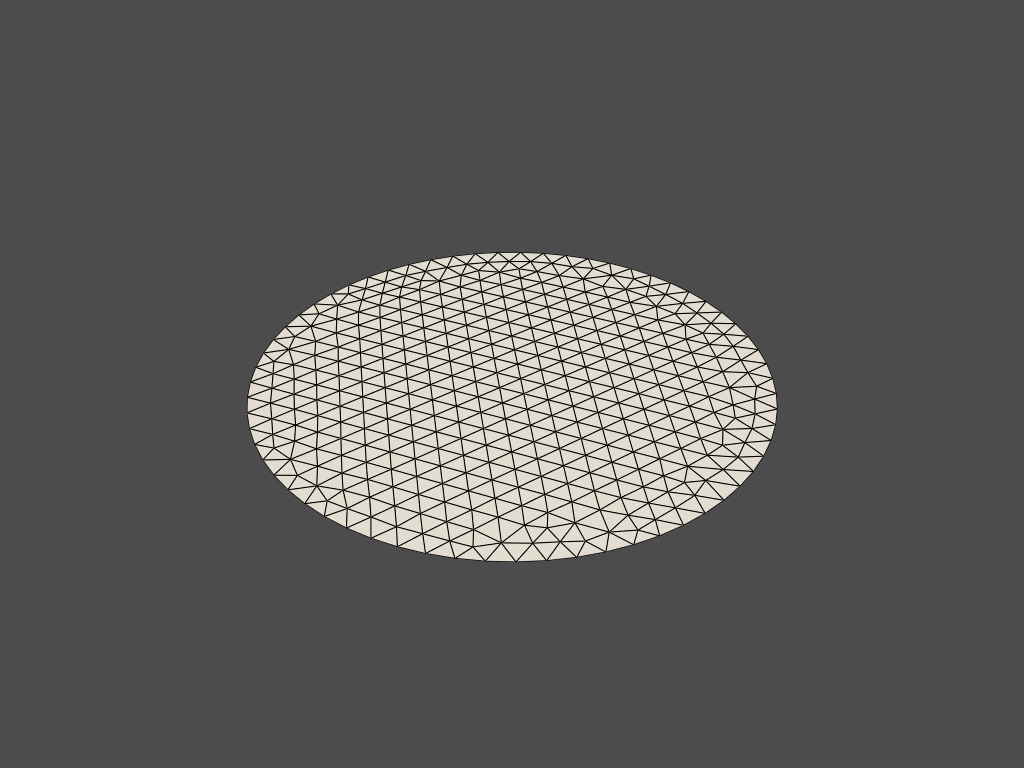

In [3]:
from dolfinx.io import gmshio
from mpi4py import MPI

# Distribute mesh over all processors from rank 0 and convert to dolfinx mesh
gmsh_model_rank = 0
mesh_comm = MPI.COMM_WORLD
domain, cell_markers, facet_markers = gmshio.model_to_mesh(gmsh.model, mesh_comm, gmsh_model_rank, gdim=gdim)

# Define the function space our mesh will be an element of (Lagrane polynomials of degree 1)
from dolfinx import fem
V = fem.FunctionSpace(domain, ("CG", 1))

from dolfinx.plot import create_vtk_mesh
import pyvista
pyvista.start_xvfb()

# Convert dolfinx mesh to pyvista unstructured grid
topology, cell_types, x = create_vtk_mesh(V)
grid = pyvista.UnstructuredGrid(topology, cell_types, x)

# Plot with pyvista
plotter = pyvista.Plotter()
plotter.add_mesh(grid, show_edges=True, show_scalar_bar=True)
if not pyvista.OFF_SCREEN:
    plotter.show()
else:
    plotter.screenshot("mesh.png")

Now we have a mesh, we can redefine the space of continuous piecewise linear polynomials on said mesh as,

$$
V_h = \{ v \, : \, v \in C^0(\Omega), \, v|_K \in P_1(K), \, \forall K \in \mathcal{K} \}
$$
where each $K$ is an individual triangle and
$$
P_1 = \{ v \, : \, v = c_0 + c_1x_1 + c_2x_2, \,\, (x1,x2) \in K, \,\, c_0, c_1, c_2 \in R \}
$$
is the space of linear 2-dimensional polynomials. So each member of $V_h$ is a collection of planes over some mesh. Below is an example of such a function.

<img src="Continuous_piecewise_linear_2d.png" style="display:block;margin-left:auto;margin-right:auto;width:30%">
<figcaption style="font-style:italic;text-align:center;">Fig.11 - 2D continuous piecewise linear function over a circular mesh</figcaption>

The basis for this new 2D $V_h$ is very similar to the 1D version. Once again it uses the Kronecker delta to define the function at nodal values and linearly interpolates between them. We continue to denote these hat functions $\phi_i(x)$. Such that $v\in V_h$ can we written $v(x) = \sum_{i=0}^{n_p} v(N_i)\phi_i$, where $n_p$ is the total number of nodes in the mesh and $N_i$ is the $i$-th node.

### 4.2 2D Variational Formulation

Let's now consider the 2 dimensional version of the problem we encountered earlier - The Poisson Equation. This uses partial derivatives, so look to Section 2 for a refresher. The 2 dimensional form the equation is

$$
\begin{align*}
-\left( \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} \right) &= f, \quad \text{in } \Omega \\ u&=0, \quad \text{ on } \delta \Omega
\end{align*}
$$

Which you should notice is the Laplace operator. Firstly we find the variational formulation. To do this, we multiply by some test function $v \in V_0$ and integrate both sides to give,

$$
\begin{align*}
f &= -\nabla^2 u \\
\iint_\Omega fv \, \mathrm{d}S &= -\iint_\Omega v\nabla^2 u \, \mathrm{d}S 
\end{align*}
$$

Now to simplify, recall Green's First Identity which was derived at the end of Section 2.4. It is written in it's two dimensional form as,

$$
\iint_{\Omega} \bigg( (\nabla f) \cdot (\nabla g) + f\nabla^{2} g \bigg) \, \mathrm{d}S = \int_{\delta \Omega} f \, \nabla\,g\cdot \boldsymbol{\underline{\mathrm{d}S}}
$$

We can rearrange for $\iint_S f\nabla^2g$,

$$
\iint_{\Omega} ( f\nabla^{2} g ) \, \mathrm{d}V = -\iint_{\Omega} (\nabla f) \cdot (\nabla g) \, \mathrm{d}S +  \int_{\delta \Omega} f \, \nabla\,g\cdot \boldsymbol{\underline{\mathrm{d}S}}
$$

Which we can then plug into our equation with $u=f$ and $v=g$ to yield,

$$
\iint_\Omega f \, \mathrm{d}S = \iint_{\Omega} (\nabla u) \cdot (\nabla v) \, \mathrm{d}S - \int_{\delta \Omega} u \, \nabla\,v\cdot \boldsymbol{\underline{\mathrm{d}S}}
$$

Then recall that both $u$ and $v$ are $0$ on the boundary of $S$, leading to the second term on the LHS to disappear, giving the final form of our variational equation.

$$
\iint_\Omega f \, \mathrm{d}S = \iint_{\Omega} (\nabla u) \cdot (\nabla v) \, \mathrm{d}S, \quad \forall v \in V_0
$$

We then turn our continuous problem into a finite element problem by replacing $V_0$ with the subset $V_{h,0} = \{v \, : \, v \in V_h, \, v|_{\delta\Omega}=0\}$.

$$
\iint_\Omega f \, \mathrm{d}S = \iint_{\Omega} (\nabla u_h) \cdot (\nabla v) \, \mathrm{d}S, \quad \forall v \in V_{h,0} \tag*{[8]}
$$

### 4.3 Constructing the Linear System and Solving

Similarly to 3.4, we can use the fact that $v$ is a linear combination of basis vectors to break the equation into several independent equations. This gives

$$
\iint_\Omega f \phi_i \, \mathrm{d}S = \iint_\Omega (\nabla u_h') \cdot (\nabla \phi_i) \,\mathrm{d}S, \quad i=1,2,\cdots, n_{\text{int}}
$$

Where $n_{\text{int}}$ is then number of interior nodes in the mesh. Remember, $v$ is required to vanish on the exterior of $\Omega$, so this is why we are summing from $1$ to $n_{\text{int}}$. Once again we use the fact that $u_h \in V_{h,0}$ to write $u_h = \sum_{j=1}^{n_{\text{int}}} c_j \phi_j$. Inseting this into the above gives

$$
\begin{align*}
\iint_\Omega f \phi_i \, \mathrm{d}S &= \iint_\Omega \nabla \left(\sum_{j=1}^{n_{\text{int}}} c_j \phi_j \right) \cdot (\nabla \phi_i) \,\mathrm{d}S \\
&= \sum_{j=1}^{n_{\text{int}}} c_j \iint_\Omega (\nabla \phi_j ) \cdot (\nabla \phi_i) \,\mathrm{d}S
\end{align*}
$$

Then we can define our mass matrix and load vectors.

$$
\begin{align*}
A_{ij} &= \iint_\Omega (\nabla \phi_j ) \cdot (\nabla \phi_i) \,\mathrm{d}S, \quad i,j = 1,2, \cdots, n_{\text{int}} \\
b_i &= \iint_\Omega f \phi_i \, \mathrm{d}S, \quad i=1, 2, \cdots,  n_{\text{int}}.
\end{align*}
$$

Giving, $$\boldsymbol{\underline{\underline{A}}} \, \boldsymbol{\underline{c}} = \boldsymbol{\underline{b}}$$ which we solve for the degrees of freedom $c_i$.

### 4.4 Boundary Conditions and Modelling

Boundary conditions are constraints that our solution must satisfy on the boundary of our domain. For both Poisson equations we have solved so far, the boundary conditions have been that $u(x) = 0$ if $x \in \delta\Omega$. This was a very handy assumption, as it led terms in our variational equation to vanish, leading to a much simpler result. This will not always be the case. The $0$ boundary condition case hopefully demonstrated the way FEM works, but in practice, forming the system of linear equations will be a bit more complicated. There are three types of boundary condition we need to talk about. Those are **Dirichlet**, **Neumann**, and **Robin**. Consider a partial differential equation with unknown function $u$. 

##### Dirichlet
Dirichlet conditions take the form $u(x) = f(x) \,\, \forall x \in \delta\Omega$. They tend to be the most simple and our $0$ boundary condition was an example of this. They describe the value the solution must take on the boundary.

##### Neumann
Neumann conditions take the form $u'(x) = f(x) \,\, \forall x \in \delta\Omega$. These conditions specify the value the derivative of our solution must take on the boundary of our domain.

##### Robin
Robin conditions take the form $au'(x) + bu(x) = f(x) \,\, \forall x \in \delta\Omega$. Here, $a$ and $b$ are known constants. These conditions specify that some linear combination of the solution and its derivative must equal a given function on the boundary of $\Omega$.

Different systems require different boundary conditions to describe the physics of what is happening and constrain the fields to known physical laws. For instance, in an incompressible fluid, we have that the divergence is $0$ on the boundary. This would be an example of a Neumann condition, since divergence is $\nabla \cdot u$ which is a function of the partial derivatives of $u$. Many physical systems can be modelled using PDEs and the strength of the Finite Element Method is its ability to adapt to practically all use cases. Depending on the model, different techniques will need to be used to derive the variational form, but once you have it, the method can be used all the same. As you can recall, we used Green's first identity to derive the variational form of the Poisson equation, which is a very useful PDE which can be applied to elastic deformation, heat flow, fluid flow and electrostatics.

These are the steps one must take to solve a boundary value problem using the Finite Element Method.

1. Define a mesh over your solution space. The greater the mesh size, the more accurate your solution will be.

2. Derive the variational form of your problem. This is done in 3 steps:
    - Multiply both sides of the PDE by a test function $v$.
    - Integrate over your domain.
    - Perform integration by parts and use the fact that $v=0$ on the boundary to simplify in a linear and bilinear form.
    
3. Construct a linear system of equations by replacing your test and trial spaces, with a finite element subspaces and substituting in your test and trial functions as a linear combination of basis functions from these subspaces.

4. Solve the resulting linear system.

## 5. Time Dependent Problems

### 5.1 Discretising time

So far, we have only looked at boundary value problems. These are differential equations that vary in space, but not in time. They are supplied with boundary conditions to fix the solution. We will now take a look at initial boundary value problems, and see how they fit into our current process for deriving a finite element approximation.

IBVPs are differential equations that are functions of both space and time, together with boundary conditions and inital conditions. For our example, we will return to the heat equation. The definition of the problem is,

$$
\begin{align*}
\frac{\partial u}{\partial t} &= \nabla^2u + f \quad& x\in\Omega, \, t\in [0,T] \\
u &= u_D \quad& x \in \delta\Omega, \, t\in [0,T] \\
u &= u_0 \quad& t=0
\end{align*}
$$

We are considering the 2-dimensional variant of the problem here, so $u = u(x,y,t)$ and $\Omega \in \mathbb{R}^2$. $f$, which is the function describing the source of the heat, may also vary with space and time.

One approach to solving time dependent PDEs is by discretising time using the **backwards Euler method**, which you may have covered in numerical computation. The point of discretising time in this way is to obtain a sequence of stationary problems, each relying on the previous time step. The smaller our time step, the more accurate our solution will be. Using this approach, we can say the relationship described in the PDE holds at time $t=n+1$.
$$
\frac{\partial u}{\partial t}\,\bigg|_{t=n+1} = \nabla^2u\,\big|_{t=n+1} + f\,\big|_{t=n+1}
$$

For readability, we will use the superscript notation, so $f|_{t=n+1}$ will be denoted $f^{n+1}$. We then use the following approximation for the derivative often called a difference quotient,

$$
\left( \frac{\partial u}{\partial t} \right) ^ {n+1} \approx \frac{u^{n+1} - u^n}{\Delta t}
$$

This approximation yields the discrete time version of the heat equation.

$$
\begin{align*}
\frac{u^{n+1} - u^n}{\Delta t} &= \nabla^2u^{n+1} + f^{n+1} \\
u^{n+1} - u^n &= \nabla^2u^{n+1}\Delta t + f^{n+1}\Delta t \\
u^{n+1} -\nabla^2u^{n+1}\Delta t &= u^n + f^{n+1}\Delta t
\end{align*}
$$

### 5.2 Interpolation and $L^2$-Projection

In the final line of 5.1, we have moved all the unknowns to the left (assuming $u^n$ is known from the previous time step). So, we proceed by constructing a variational problem for each $u^i$, and use the solution of each to feed into $u^{i+1}$. This means we must use $u_0$ to find the following solutions. The problem is, $u_0$ is not an approximate solution, it is continuous and known. We need to approximate it in the same space that $u_h$ comes from, namely $V_h$.

There are two main ways of doing this, the first is called **interpolation**.
Recall from section 4.1 that we can write any function $v \in V_h$ as $v(x) = \sum_{i_0}^{n_p} v(N_i)\phi_i$. So, if $v$ is known, we only have to work out the value of the function at the nodal values in order to produce an approximation. Hence we say $u_0$ is approximated by $u_h^0 = \sum_{i_0}^{n_p} u_0(N_i)\phi_i$ This is the process of interpolation.

The second method is called **$L^2$-projection** and more closely resembles the finite element method. $L^2$-projection give a "good on average" approximation, which means it may not be exactly correct at the nodes like interpolation is, but it provides the least overall error. In fact, it can be shown that the $L^2$-projection is the minimiser of the $L^2$-error in $V_h$. Suppose we want to approximate $u_0$ with $u_h^0$ using $L^2$-Projection. $u_h^0$ must satisfy,

$$
\int_\Omega (u_0 - u_h^0)v \, \mathrm{d}x = 0, \quad \forall v \in V_h
$$

This should hopefully look familiar, we already have the tools to solve this for $u_h^0$. We substitute in $v=\sum_{i=0}^{n_p}\alpha_i\phi_i$ and split into $n_p+1$ equations. Then substitute $u_h^0 = \sum_{j=0}^{n_p} c_j \phi_j$, form a system of linear equations and solve.

##### Check Exercises 10

- Find the variational form of the heat equation, by letting $u=u^{n+1}$ and integrating. Use Green's first identity!